In [8]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
#import contextily as ctx
import matplotlib as mpl
#import mapclassify
import pyproj

In [8]:
!pip install mgwr


In [9]:
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from libpysal.examples import load_example
from sklearn.preprocessing import StandardScaler
import numpy as np

ModuleNotFoundError: No module named 'mgwr'

In [8]:
!pip install spreg


In [7]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [53]:
#estaciones 
est = pd.read_csv(r"C:\Users\Documents\unal\analisis geoespacial\Estaciones_CalidadAire.csv", encoding='latin1')
est.head()

,Codigo,Estacion,Longitud,Latitud,Ciudad
0,6,Politecnico Colombiano Jaime Isaza Cadavid - M...,-75.57777,6.20897,Medellin
1,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin
2,28,Itagüí - Casa de Justicia Itagüí,-75.59721,6.18567,Medellin
3,37,Universidad San Buenaventura,-75.56867,6.33070,Bello
4,38,Itagüí - I.E. Concejo Municipal de Itagüí,-75.64436,6.16850,Itagüí


In [54]:

est['geometry'] = est.apply(
    lambda row: Point(row['Longitud'], row['Latitud']),  # Asegúrate de que los nombres de las columnas coincidan
    axis=1
)
estaciones = gpd.GeoDataFrame(est, geometry='geometry', crs="EPSG:4326")  # CRS para coordenadas geográficas (WGS84)
print(estaciones)

    Codigo                                           Estacion  Longitud   
0        6  Politecnico Colombiano Jaime Isaza Cadavid - M... -75.57777  \
1       12                            Estación Tráfico Centro -75.56958   
2       28                   Itagüí - Casa de Justicia Itagüí -75.59721   
3       37                       Universidad San Buenaventura -75.56867   
4       38          Itagüí - I.E. Concejo Municipal de Itagüí -75.64436   
5       40                                Parque de las Aguas -75.41949   
6       41                            Universidad de Medellin -75.60996   
7       43                                  Tanque Miraflores -75.54919   
8       46                       Exito San Antonio - Medellin -75.56747   
9       69                   Caldas - E U Joaquín Aristizabal -75.63776   
10      78                             La Estrella - Hospital -75.64417   
11      79     Medellín, Altavista - I.E. Pedro Octavio Amado -75.61060   
12      80  Medellín, Vil

In [55]:
estaciones = estaciones.rename(columns={"Codigo": "Codigo_calidad"})

In [56]:
#datos de pm25
dpm25=pd.read_csv(r"C:\Users\Documents\unal\analisis geoespacial\datos pm25\dffinalpm25.csv")
print(dpm25)

     fecha_hora  Codigo_calidad       pm25  pp_diaria  temperatura  superado
0    2022-03-01              12  23.095238      1.524    21.068653         1
1    2022-03-01              90  16.620707      4.064    19.842549         1
2    2022-03-01              69  18.233983      1.016    18.282292         1
3    2022-03-01              94   5.529111      0.508    13.678354         0
4    2022-03-01              84  18.473157      1.778    19.714701         1
..          ...             ...        ...        ...          ...       ...
460  2022-03-31              87  16.540717      2.286    18.401757         1
461  2022-03-31              69  24.250258     11.684    17.666806         1
462  2022-03-31              38  24.083333      0.762    18.023326         1
463  2022-03-31              82  13.351865      2.286    19.426250         0
464  2022-03-31              94   7.542362      8.636    12.919854         0

[465 rows x 6 columns]


In [57]:
estpm25 = pd.merge(estaciones, dpm25, on="Codigo_calidad")
estpm25

,Codigo_calidad,Estacion,Longitud,Latitud,Ciudad,geometry,fecha_hora,pm25,pp_diaria,temperatura,superado
0,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),2022-03-01,23.095238,1.524,21.068653,1
1,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),2022-03-02,36.608696,11.684,19.719576,1
2,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),2022-03-03,26.708333,0.000,21.488243,1
3,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),2022-03-04,31.250000,7.620,20.839021,1
4,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),2022-03-05,29.909091,22.098,19.510799,1
...,...,...,...,...,...,...,...,...,...,...,...
460,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),2022-03-27,11.419012,30.480,13.013090,0
461,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),2022-03-28,9.310604,5.588,13.725132,0
462,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),2022-03-29,9.186888,6.350,12.950444,0
463,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),2022-03-30,9.721697,0.762,12.804520,0


In [69]:
import seaborn as sns

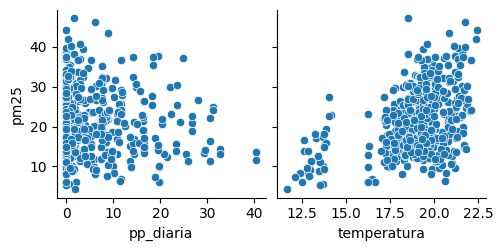

In [70]:
sns.pairplot(estpm25, x_vars=["pp_diaria", "temperatura"], y_vars=["pm25"], kind="scatter")
plt.show()

In [14]:
estpm25.columns

Index(['Codigo_calidad', 'Estacion', 'Longitud', 'Latitud', 'Ciudad',
       'geometry', 'fecha_hora', 'pm25', 'pp_diaria', 'temperatura',
       'superado'],
      dtype='object')

In [59]:
coords_unicas = estpm25.groupby('Estacion')[['Latitud', 'Longitud']].first().values 

**Se miro la distribución de los datos diarios, esto se hizo debido a que se realizará un análisis diario y horario de los datos , para poder comparar dichos datos con los datos de raster que se procesarán**
Para los datos diarios se observo que presenta una distribución lognormal y además se realizó el el ols y mgwr 
También se calculó el moran de manera que pudiera observar cuales son las estaciones que en el mes mantienen con las concentraciones más altas de material particulado, las que tienen concentraciones más bajas 

In [60]:
#moran
import libpysal as ps
k = 3  # Número de vecinos 
w_knn = ps.weights.KNN.from_array(coords_unicas, k=3)

In [61]:
print("Número de conexiones:", w_knn.n)

Número de conexiones: 15


In [62]:
pm25_promedio = estpm25.groupby('Estacion').agg({'pm25':'mean'}).reset_index()
pm25_promedio

,Estacion,pm25
0,Barbosa - Torre Social,16.172026
1,Bello - I.E. Fernando Vélez,18.611428
2,Caldas - E U Joaquín Aristizabal,20.328367
3,Copacabana - Ciudadela Educativa La Vida,18.703870
4,Envigado - E.S.E. Santa Gertrudis,20.007952
5,Estación Tráfico Centro,31.451636
6,Itagüí - I.E. Concejo Municipal de Itagüí,19.828446
7,La Estrella - Hospital,21.028296
8,"Medellin, Belén - I.E Pedro Justo Berrio",26.117569
9,Medellín - Santa Elena,12.692992


In [19]:
pm25_promedio.describe()

,pm25
count,15.000000
mean,20.863818
std,4.224323
min,12.692992
25%,19.150506
50%,20.328367
75%,22.209226
max,31.451636


In [64]:
gdf = gpd.GeoDataFrame(estpm25, geometry='geometry', crs="EPSG:4326") 

In [63]:
from esda.moran import Moran
moran_pm25 = Moran(pm25_promedio["pm25"], w_knn, permutations=9999)
print(f"I de Moran: {moran_pm25.I}, p-value: {moran_pm25.p_sim}")


I de Moran: 0.15849047083049142, p-value: 0.0673


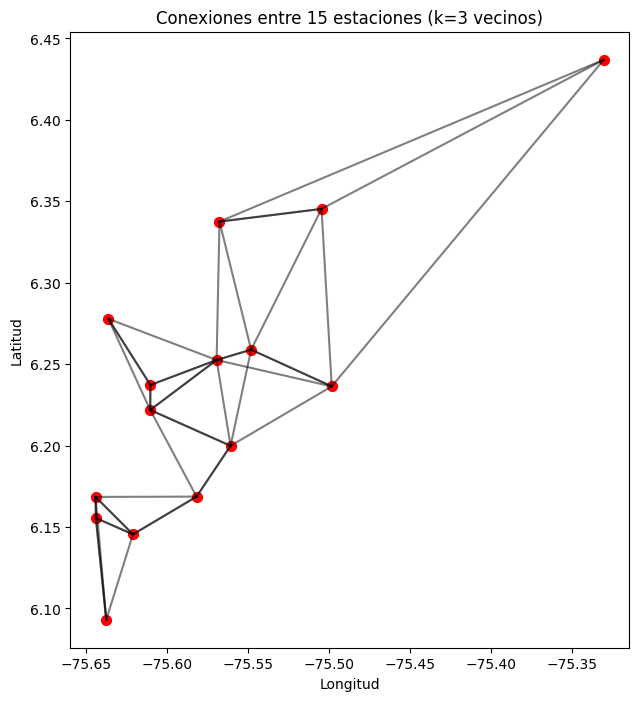

In [65]:
import matplotlib.pyplot as plt

# GeoDataFrame con las ubicaciones únicas
gdf_estaciones = gpd.GeoDataFrame(
    geometry=gpd.points_from_xy(coords_unicas[:, 1], coords_unicas[:, 0]),  # Lon, Lat
    crs="EPSG:4326"
)

# Grafica
fig, ax = plt.subplots(figsize=(10, 8))
gdf_estaciones.plot(ax=ax, color='red', markersize=50)

# conexiones
for i, neighbors in w_knn.neighbors.items():
    for j in neighbors:
        ax.plot(
            [coords_unicas[i, 1], coords_unicas[j, 1]],  # Lon
            [coords_unicas[i, 0], coords_unicas[j, 0]],  # Lat
            'k-', alpha=0.5
        )

ax.set_title("Conexiones entre 15 estaciones (k=3 vecinos)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

Tamaño de y_std: (15,)
Tamaño de spatial_lag_std: (15,)


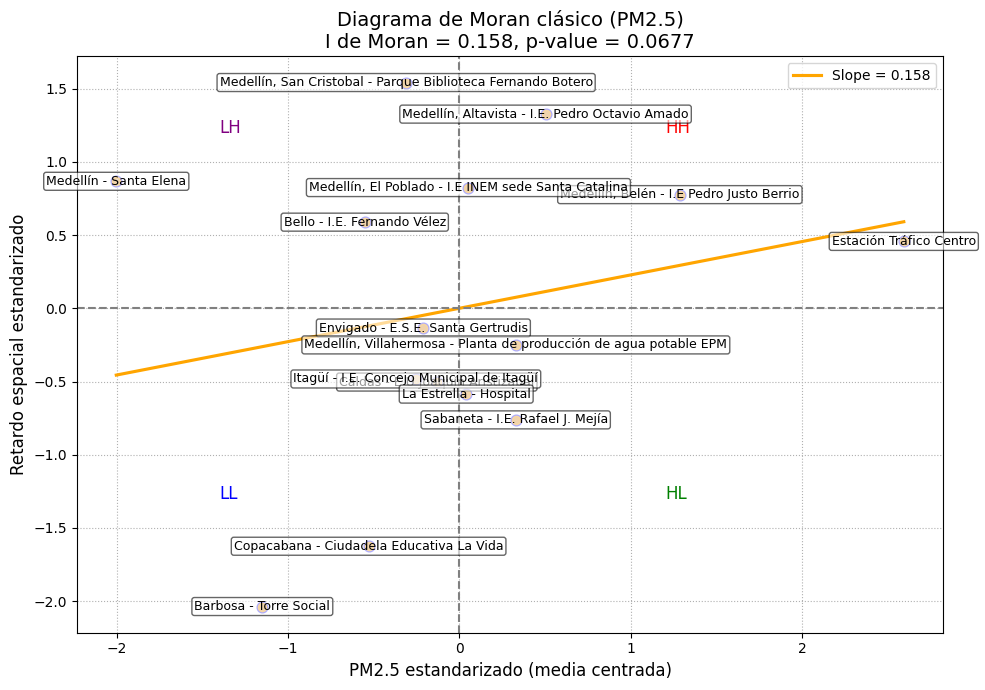

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from esda.moran import Moran

# Datos
y = pm25_promedio["pm25"].values
w = w_knn  

# Cálculo de Moran
moran_pm25 = Moran(y, w, permutations=9999)

# Estandarización
y_std = (y - y.mean()) / y.std()
spatial_lag = w.sparse @ y
spatial_lag_std = (spatial_lag - spatial_lag.mean()) / spatial_lag.std()

# Verificación
print("Tamaño de y_std:", y_std.shape)
print("Tamaño de spatial_lag_std:", spatial_lag_std.shape)

# Gráfico
plt.figure(figsize=(10, 7))
plt.scatter(y_std, spatial_lag_std, s=60, alpha=0.7, color='blue')

# Línea de regresión
sns.regplot(x=y_std, y=spatial_lag_std, ci=None, color='orange',
            line_kws={'label': f'Slope = {moran_pm25.I:.3f}'})

# Referencias
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# Cuadrantes
plt.text(1.2, 1.2, 'HH', fontsize=12, color='red')
plt.text(-1.4, -1.3, 'LL', fontsize=12, color='blue')
plt.text(1.2, -1.3, 'HL', fontsize=12, color='green')
plt.text(-1.4, 1.2, 'LH', fontsize=12, color='purple')

# Etiquetas de estaciones
for i, (x, y_) in enumerate(zip(y_std, spatial_lag_std)):
    plt.text(x, y_, pm25_promedio['Estacion'].iloc[i], fontsize=9,
             ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.6, boxstyle='round,pad=0.2'))

# Título y ejes
plt.title(f"Diagrama de Moran clásico (PM2.5)\nI de Moran = {moran_pm25.I:.3f}, p-value = {moran_pm25.p_sim:.4f}", fontsize=14)
plt.xlabel("PM2.5 estandarizado (media centrada)", fontsize=12)
plt.ylabel("Retardo espacial estandarizado", fontsize=12)

plt.legend()
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()


En este gráfico se puede observar que las zonas con mayor cantidad de material particulado se encuentran en medellín y están rodeadas de otras con altos niveles de contaminación y las estaciones con menores contaminaciones se suelen encontrar en zonas rurales.

In [66]:
from libpysal.weights import lag_spatial
# Valor de referencia fijo ( 15 µg/m³)
referencia = 15

# Centrar PM2.5 en 15 en lugar de la media
y = pm25_promedio["pm25"]
y_std = (y - referencia) / y.std()

# Calcular lag espacial con matriz de pesos
w_knn.transform = 'r'
spatial_lag_std = lag_spatial(w_knn, y_std)

# Calcular Moran's I 
from esda.moran import Moran
moran_pm25 = Moran(y, w_knn, permutations=9999)


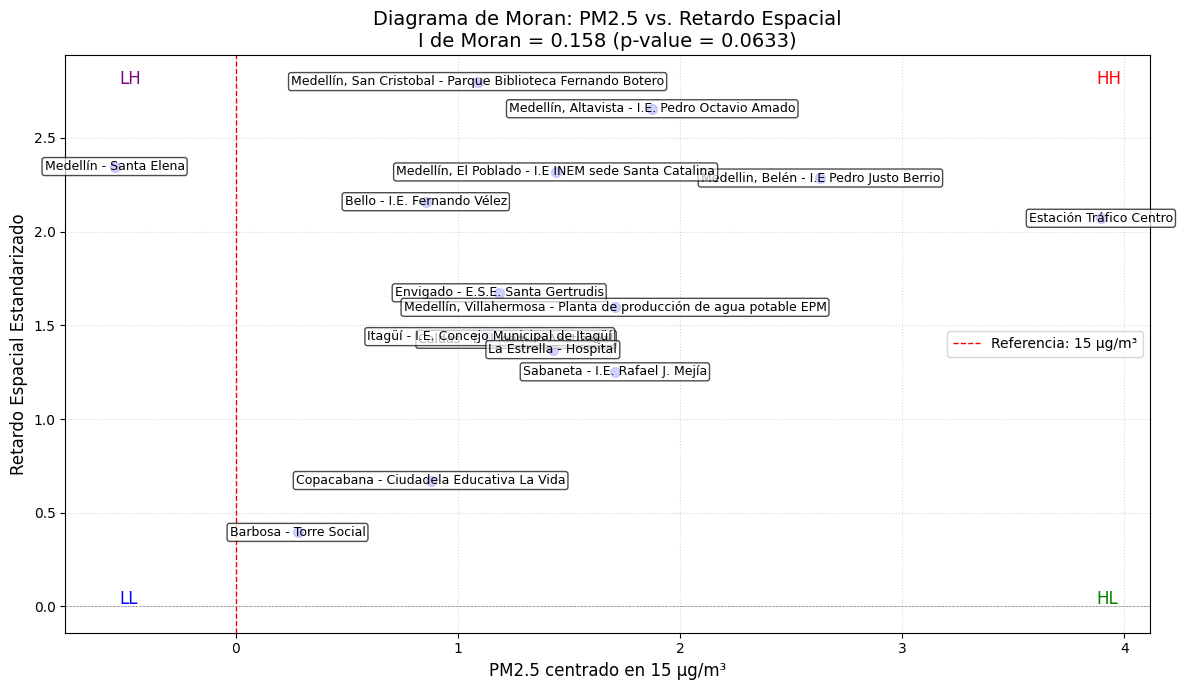

In [67]:
plt.figure(figsize=(12, 7))

scatter = plt.scatter(y_std, spatial_lag_std, c='blue', s=50, alpha=0.6)

# Líneas de referencia centradas en la "media artificial" (referencia = 15)
plt.axvline(0, color='red', linestyle='--', linewidth=1, label=f'Referencia: {referencia} µg/m³')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

plt.title(
    f"Diagrama de Moran: PM2.5 vs. Retardo Espacial\n"
    f"I de Moran = {moran_pm25.I:.3f} (p-value = {moran_pm25.p_sim:.4f})", 
    fontsize=14
)

plt.xlabel(f"PM2.5 centrado en {referencia} µg/m³", fontsize=12)
plt.ylabel("Retardo Espacial Estandarizado", fontsize=12)

# Etiquetas de estaciones
for i, (x, y) in enumerate(zip(y_std, spatial_lag_std)):
    plt.text(
        x, y, 
        pm25_promedio['Estacion'].iloc[i], 
        fontsize=9, 
        ha='center', 
        va='center',
        bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2')
    )

# Cuadrantes
plt.text(0.95, 0.95, 'HH', transform=plt.gca().transAxes, fontsize=12, color='red')
plt.text(0.05, 0.05, 'LL', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.text(0.95, 0.05, 'HL', transform=plt.gca().transAxes, fontsize=12, color='green')
plt.text(0.05, 0.95, 'LH', transform=plt.gca().transAxes, fontsize=12, color='purple')

plt.legend()
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


Este gráfico es ilustrativo , quiere decir que en los promedios realizados en las estaciones todas las estaciones tienden a estar encima del máximo permisible excepto la de Santa Elena.

In [35]:
def analizar_distribuciones(df, variable, nombre_visible=None):
    if nombre_visible is None:
        nombre_visible = variable
        
    data = df[variable].dropna()
    
    results = {}
    
    distributions = {
        'normal': stats.norm,
        'lognormal': stats.lognorm,
        'exponencial': stats.expon,
        'gamma': stats.gamma,
        'gumbel_r': stats.gumbel_r,
        'frechet_r': stats.genextreme
    }

    for name, dist in distributions.items():
        try:
            if name == 'lognormal':
                params = dist.fit(data, floc=0)
            else:
                params = dist.fit(data)
                
            D, p_value = stats.kstest(data, dist.name, args=params)
            results[name] = {
                'params': params,
                'D': D,
                'p_value': p_value
            }
        except Exception as e:
            print(f"Error con {name}: {e}")
    
    print(f"\nResultados del test K-S para '{nombre_visible}':")
    for name, res in sorted(results.items(), key=lambda x: x[1]['p_value'], reverse=True):
        print(f"{name.title():<12} | D = {res['D']:.4f} | p = {res['p_value']:.4f}")

    x = np.linspace(data.min(), data.max(), 1000)
    sns.histplot(data, kde=False, stat='density', bins=30, color='gray', alpha=0.5, label='Datos reales')

    for name, res in results.items():
        dist = distributions[name]
        y = dist.pdf(x, *res['params'])
        plt.plot(x, y, label=name)

    plt.title(f"Comparación de distribuciones para {nombre_visible}")
    plt.xlabel(nombre_visible)
    plt.ylabel("Densidad")
    plt.legend()
    plt.grid(True)
    plt.show()


In [36]:
from scipy import stats



Resultados del test K-S para 'Temperatura':
Frechet_R    | D = 0.0953 | p = 0.0004
Normal       | D = 0.1289 | p = 0.0000
Gamma        | D = 0.1499 | p = 0.0000
Lognormal    | D = 0.1606 | p = 0.0000
Gumbel_R     | D = 0.1983 | p = 0.0000
Exponencial  | D = 0.4397 | p = 0.0000


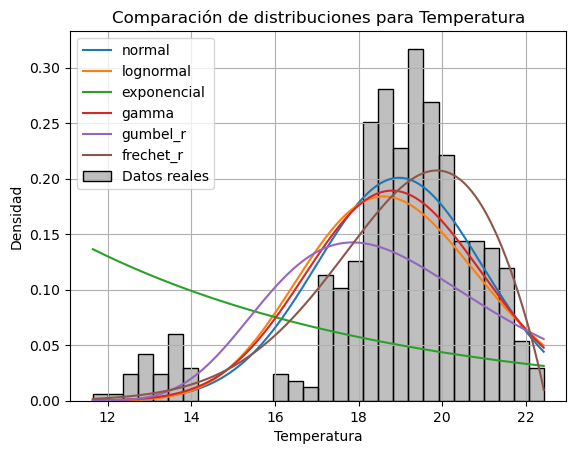

In [37]:
analizar_distribuciones(estpm25, 'temperatura', nombre_visible='Temperatura')



Resultados del test K-S para 'PM2.5':
Gumbel_R     | D = 0.0397 | p = 0.4449
Lognormal    | D = 0.0400 | p = 0.4350
Gamma        | D = 0.0458 | p = 0.2740
Frechet_R    | D = 0.0504 | p = 0.1820
Normal       | D = 0.0880 | p = 0.0014
Exponencial  | D = 0.2650 | p = 0.0000


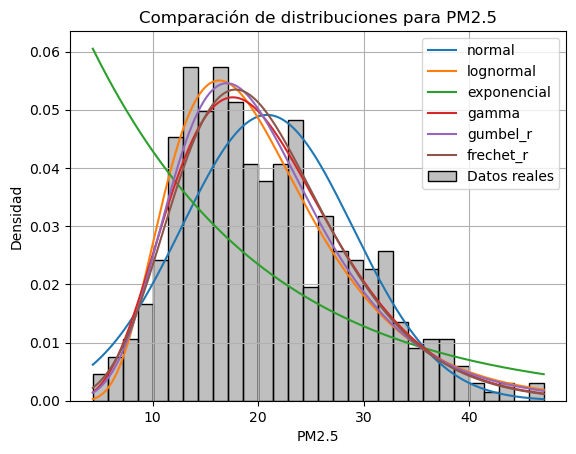

In [38]:
analizar_distribuciones(estpm25, 'pm25', nombre_visible='PM2.5')

In [37]:
p_cero = np.mean(estpm25['pp_diaria'] == 0)  
print(f"Probabilidad de día seco (p): {p_cero:.2f}")

Probabilidad de día seco (p): 0.30


Parámetros Lognormal (s, loc, scale): (1.306329721312171, 0.0, 4.119022583803225)


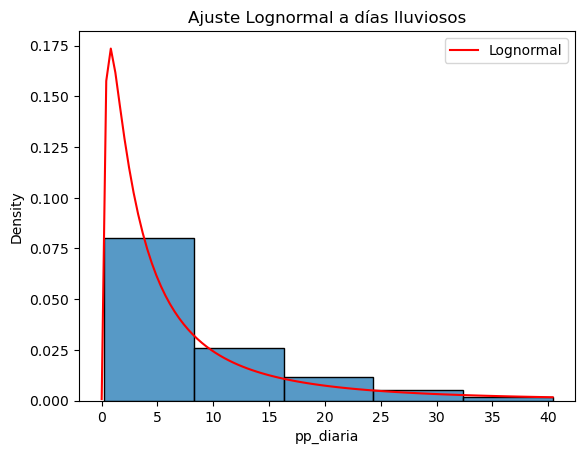

In [38]:
precip_positiva = estpm25[estpm25['pp_diaria'] > 0]['pp_diaria']

# Ajustar distribución Lognormal a los datos > 0
params_lognorm = stats.lognorm.fit(precip_positiva, floc=0)  # floc=0 para forzar loc=0
print(f"Parámetros Lognormal (s, loc, scale): {params_lognorm}")

# Graficar histograma + densidad ajustada
sns.histplot(precip_positiva, stat='density', bins=5, kde=False)
x = np.linspace(0.01, max(precip_positiva), 100)
plt.plot(x, stats.lognorm.pdf(x, *params_lognorm), 'r-', label='Lognormal')
plt.legend()
plt.title('Ajuste Lognormal a días lluviosos')
plt.show()

In [40]:
def delta_lognormal_pdf(x, p, s, scale):
    """Función de densidad (PDF) para el modelo Delta-Lognormal"""
    if isinstance(x, (float, int)):
        return p if x == 0 else (1 - p) * stats.lognorm.pdf(x, s, 0, scale)
    else:  # Para arrays o Series
        return np.where(x == 0, p, (1 - p) * stats.lognorm.pdf(x, s, 0, scale))

In [42]:
prob_mayor_0mm = (1 - p_cero) * (1 - stats.lognorm.cdf(2, *params_lognorm))
print(f"P(X > 0 mm): {prob_mayor_0mm:.2f}")

P(X > 0 mm): 0.50


In [24]:
estpm25['logpm25'] = np.log1p(estpm25['pm25'])

In [25]:
estpm25

,Codigo_calidad,Estacion,Longitud,Latitud,Ciudad,geometry,fecha_hora,pm25,pp_diaria,temperatura,superado,logpm25
0,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),2022-03-01,23.095238,1.524,21.068653,1,3.182014
1,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),2022-03-02,36.608696,11.684,19.719576,1,3.627235
2,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),2022-03-03,26.708333,0.000,21.488243,1,3.321733
3,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),2022-03-04,31.250000,7.620,20.839021,1,3.473518
4,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),2022-03-05,29.909091,22.098,19.510799,1,3.431050
...,...,...,...,...,...,...,...,...,...,...,...,...
460,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),2022-03-27,11.419012,30.480,13.013090,0,2.519229
461,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),2022-03-28,9.310604,5.588,13.725132,0,2.333173
462,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),2022-03-29,9.186888,6.350,12.950444,0,2.321101
463,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),2022-03-30,9.721697,0.762,12.804520,0,2.372269


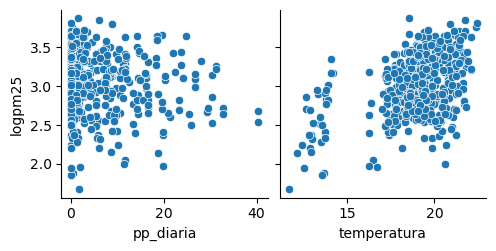

In [26]:
import seaborn as sns
sns.pairplot(estpm25, x_vars=["pp_diaria", "temperatura"], y_vars=["logpm25"], kind="scatter")
plt.show()

In [44]:
df_agg=pd.read_excel(r"C:\Users\Documents\unal\analisis geoespacial\datos\df_gg.xlsx")
df_agg

,Unnamed: 0,Estacion,pm25,pp_diaria,temperatura,Latitud,Longitud,logpm25
0,0,Barbosa - Torre Social,16.172026,3.605161,20.525628,6.43696,-75.33040,2.783283
1,1,Bello - I.E. Fernando Vélez,18.611428,4.129548,19.154723,6.33755,-75.56780,2.923776
2,2,Caldas - E U Joaquín Aristizabal,20.328367,4.506452,18.172507,6.09308,-75.63776,3.012017
3,3,Copacabana - Ciudadela Educativa La Vida,18.703870,4.129548,20.542402,6.34536,-75.50475,2.928730
4,4,Envigado - E.S.E. Santa Gertrudis,20.007952,5.260258,20.380514,6.16868,-75.58197,2.996130
5,5,Estación Tráfico Centro,31.451636,6.563032,20.995060,6.25256,-75.56958,3.448451
6,6,Itagüí - I.E. Concejo Municipal de Itagüí,19.828446,7.357806,18.851382,6.16850,-75.64436,2.987118
7,7,La Estrella - Hospital,21.028296,9.078452,19.306679,6.15553,-75.64417,3.045869
8,8,"Medellin, Belén - I.E Pedro Justo Berrio",26.117569,4.973484,18.564340,6.23723,-75.61047,3.262608
9,9,Medellín - Santa Elena,12.692992,5.350387,13.277141,6.23636,-75.49847,2.541050


In [45]:
resultado = pd.merge(
    df_agg,          # DataFrame con variables
    est,                   # DataFrame con códigos y localización
    on="Estacion",         # Columna en común
    how="left"             # Mantener todas las filas del primer DataFrame (df_variables)
)

In [46]:
resultado

,Unnamed: 0,Estacion,pm25,pp_diaria,temperatura,Latitud_x,Longitud_x,logpm25,Codigo,Longitud_y,Latitud_y,Ciudad,geometry
0,0,Barbosa - Torre Social,16.172026,3.605161,20.525628,6.43696,-75.33040,2.783283,81,-75.33040,6.43696,Barbosa,POINT (-75.3304 6.43696)
1,1,Bello - I.E. Fernando Vélez,18.611428,4.129548,19.154723,6.33755,-75.56780,2.923776,87,-75.56780,6.33755,Bello,POINT (-75.5678 6.33755)
2,2,Caldas - E U Joaquín Aristizabal,20.328367,4.506452,18.172507,6.09308,-75.63776,3.012017,69,-75.63776,6.09308,Caldas,POINT (-75.63776 6.09308)
3,3,Copacabana - Ciudadela Educativa La Vida,18.703870,4.129548,20.542402,6.34536,-75.50475,2.928730,82,-75.50475,6.34536,Copacabana,POINT (-75.50475 6.34536)
4,4,Envigado - E.S.E. Santa Gertrudis,20.007952,5.260258,20.380514,6.16868,-75.58197,2.996130,88,-75.58197,6.16868,Envigado,POINT (-75.58197 6.16868)
5,5,Estación Tráfico Centro,31.451636,6.563032,20.995060,6.25256,-75.56958,3.448451,12,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256)
6,6,Itagüí - I.E. Concejo Municipal de Itagüí,19.828446,7.357806,18.851382,6.16850,-75.64436,2.987118,38,-75.64436,6.16850,Itagüí,POINT (-75.64436 6.1685)
7,7,La Estrella - Hospital,21.028296,9.078452,19.306679,6.15553,-75.64417,3.045869,78,-75.64417,6.15553,La Estrella,POINT (-75.64417 6.15553)
8,8,"Medellin, Belén - I.E Pedro Justo Berrio",26.117569,4.973484,18.564340,6.23723,-75.61047,3.262608,83,-75.61047,6.23723,Medellin,POINT (-75.61047 6.23723)
9,9,Medellín - Santa Elena,12.692992,5.350387,13.277141,6.23636,-75.49847,2.541050,94,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636)


In [41]:
resultado.columns

Index(['Unnamed: 0', 'Estacion', 'pm25', 'pp_diaria', 'temperatura',
       'Latitud_x', 'Longitud_x', 'logpm25', 'Codigo', 'Longitud_y',
       'Latitud_y', 'Ciudad', 'geometry'],
      dtype='object')

In [47]:
resultado = resultado.drop(['Estacion','Latitud_x', 'Longitud_x', 'pm25','Longitud_y',
       'Latitud_y', 'Ciudad', 'geometry','Unnamed: 0'], axis=1)

In [48]:
resultado

,pp_diaria,temperatura,logpm25,Codigo
0,3.605161,20.525628,2.783283,81
1,4.129548,19.154723,2.923776,87
2,4.506452,18.172507,3.012017,69
3,4.129548,20.542402,2.928730,82
4,5.260258,20.380514,2.996130,88
5,6.563032,20.995060,3.448451,12
6,7.357806,18.851382,2.987118,38
7,9.078452,19.306679,3.045869,78
8,4.973484,18.564340,3.262608,83
9,5.350387,13.277141,2.541050,94



Resultados del test K-S para 'pm25':
Gamma        | D = 0.1696 | p = 0.7204
Normal       | D = 0.1740 | p = 0.6916
Frechet_R    | D = 0.1749 | p = 0.6858
Lognormal    | D = 0.1801 | p = 0.6512
Gumbel_R     | D = 0.2040 | p = 0.4971
Exponencial  | D = 0.3820 | p = 0.0177


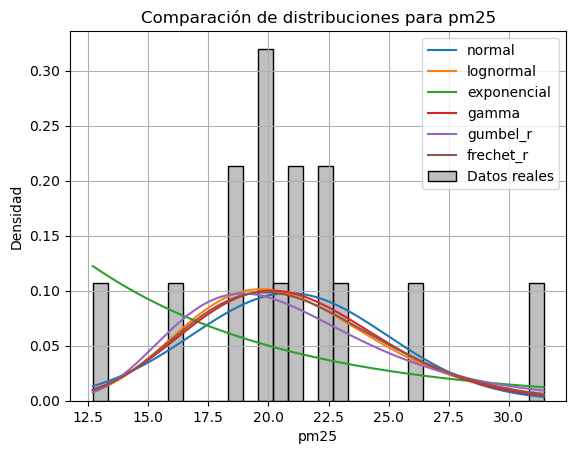

In [40]:
analizar_distribuciones(df_agg, 'pm25', nombre_visible='pm25')

In [52]:

log_pm25 = np.log(df_agg["pm25"] + 0.1)


shape_log, _, scale_log = gamma.fit(log_pm25, floc=0)


percentiles = gamma.cdf(log_pm25, shape_log, loc=0, scale=scale_log)
pm25_ajustado = gamma.ppf(percentiles, shape_log, loc=0, scale=scale_log)


df_agg["pm25_ajustado"] = np.exp(pm25_ajustado)

In [53]:
df_agg

,Unnamed: 0,Estacion,pm25,pp_diaria,temperatura,Latitud,Longitud,logpm25,pm25_ajustado
0,0,Barbosa - Torre Social,16.172026,3.605161,20.525628,6.43696,-75.33040,2.783283,16.272026
1,1,Bello - I.E. Fernando Vélez,18.611428,4.129548,19.154723,6.33755,-75.56780,2.923776,18.711428
2,2,Caldas - E U Joaquín Aristizabal,20.328367,4.506452,18.172507,6.09308,-75.63776,3.012017,20.428367
3,3,Copacabana - Ciudadela Educativa La Vida,18.703870,4.129548,20.542402,6.34536,-75.50475,2.928730,18.803870
4,4,Envigado - E.S.E. Santa Gertrudis,20.007952,5.260258,20.380514,6.16868,-75.58197,2.996130,20.107952
5,5,Estación Tráfico Centro,31.451636,6.563032,20.995060,6.25256,-75.56958,3.448451,31.551636
6,6,Itagüí - I.E. Concejo Municipal de Itagüí,19.828446,7.357806,18.851382,6.16850,-75.64436,2.987118,19.928446
7,7,La Estrella - Hospital,21.028296,9.078452,19.306679,6.15553,-75.64417,3.045869,21.128296
8,8,"Medellin, Belén - I.E Pedro Justo Berrio",26.117569,4.973484,18.564340,6.23723,-75.61047,3.262608,26.217569
9,9,Medellín - Santa Elena,12.692992,5.350387,13.277141,6.23636,-75.49847,2.541050,12.792992


In [28]:
# por días ols
X = df_agg[['pp_diaria', 'temperatura',]]  
X = sm.add_constant(X)                   
y = df_agg['logpm25']                           

modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                logpm25   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     3.907
Date:                Tue, 24 Jun 2025   Prob (F-statistic):             0.0493
Time:                        20:51:09   Log-Likelihood:                 6.9235
No. Observations:                  15   AIC:                            -7.847
Df Residuals:                      12   BIC:                            -5.723
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.6459      0.498      3.304      

In [70]:
residuos = modelo.resid.values

In [71]:
moran_resid = Moran(residuos, w_knn)
print(f"Moran I = {moran_resid.I:.4f}, p-value = {moran_resid.p_sim:.4f}")

Moran I = 0.3035, p-value = 0.0230


Este modelo me muestra que el modelo no es adecuado por lo cual se utiliza SAR y SEM

In [57]:
from scipy.stats import shapiro
_, p_valor = shapiro(modelo.resid)
print(f"Normalidad de residuos (p > 0.05): {p_valor > 0.05}")

Normalidad de residuos (p > 0.05): True


** Haciendo el modelo MGWR para datos horarios de las estaciones**

**ahora quiero analizar como cambia material particulado por día**
en este modelo estoy analizando como cambia el material particulado diariamente dependiendo de la temperatura o precipitación

In [4]:
pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\SKop981040\Documents\unal\analisis geoespacial\myenv\Scripts\python.exe -m pip install --upgrade pip


In [4]:
esthorario= pd. read_excel(r"C:\Users\Documents\unal\analisis geoespacial\horario.xlsx")
esthorario

,Unnamed: 0,Codigo,Estacion,Longitud,Latitud,Ciudad,geometry,hora,pm25,pp_horaria,temperatura,logpm25
0,0,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),1,28.026581,0.294968,19.163871,3.368212
1,1,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),2,27.870992,0.540774,18.928801,3.362837
2,2,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),3,27.077382,1.122516,18.679000,3.334964
3,3,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),4,26.379148,0.409677,18.487376,3.309782
4,4,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),5,26.380198,0.270387,18.398113,3.309820
...,...,...,...,...,...,...,...,...,...,...,...,...
355,355,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),20,11.010333,0.098323,12.894070,2.485767
356,356,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),21,12.649717,0.409677,12.673548,2.613719
357,357,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),22,12.676909,0.122903,12.506495,2.615709
358,358,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),23,11.904949,0.155677,12.283457,2.557611


In [5]:
coords = esthorario[['Longitud', 'Latitud']].values
y = esthorario[['logpm25']].values
X = esthorario[['pp_horaria', 'temperatura']].values

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from mgwr.sel_bw import Sel_BW

selector = Sel_BW(coords, y, X_scaled, multi=True)
bw = selector.search(bw_min=2)  

print("Anchos de banda por variable:", bw)

from mgwr.gwr import MGWR

mgwr_model = MGWR(coords, y, X_scaled, selector).fit()

print(mgwr_model.summary())


Anchos de banda por variable: [ 60. 314.  60.]
Model type                                                         Gaussian
Number of observations:                                                 360
Number of covariates:                                                     3

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             28.174
Log-likelihood:                                                     -52.229
AIC:                                                                110.458
AICc:                                                               112.571
BIC:                                                              -2073.165
R2:                                                                   0.064
Adj. R2:                                                              0.059

Variable                              Est.         SE  t(Est/SE)    p-value
-------------

In [39]:
mgwr_model = MGWR(coords, y, X, selector)
mgwr_results = mgwr_model.fit() 

In [42]:

y_pred = mgwr_results.predy
y_obs = mgwr_results.model.y

# Promedio de y
y_mean = y_obs.mean()

# Calcular R² local manualmente
numerador = (y_obs - y_pred)**2
denominador = (y_obs - y_mean)**2
local_r2 = 1 - (numerador / denominador)



Los resultados me indican que el efecto de la preipitación es global casi el mismo , mientras que la temperatura varia, este modelo tiene resultados más intiutivos debido a que la temperatura tiene un efecto positivo en el pm25, mientras que la lluvia presenta un efecto negativo

In [9]:
from mgwr.gwr import MGWR
from mgwr.sel_bw import Sel_BW
from sklearn.preprocessing import StandardScaler
import pandas as pd

resultados_mgwr = []

for hora in range(1, 25):
    df_hora = esthorario[esthorario['hora'] == hora]

    if len(df_hora) < 10:
        print(f"Hora {hora} omitida por pocos datos ({len(df_hora)} observaciones)")
        continue

    coords = df_hora[['Longitud', 'Latitud']].values
    y = df_hora[['logpm25']].values
    X = df_hora[['pp_horaria', 'temperatura']].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    try:
        selector = Sel_BW(coords, y, X_scaled, multi=True, fixed=True)
        bw = selector.search(bw_min=2, bw_max=5)

        mgwr_model = MGWR(coords, y, X_scaled, selector, fixed=True).fit()

        df_coef = pd.DataFrame(
            mgwr_model.params,
            columns=['Intercepto', 'pp_horaria', 'temperatura']
        )
        df_coef['hora'] = hora
        df_coef['Codigo'] = df_hora['Codigo'].values

        resultados_mgwr.append(df_coef)

    except Exception as e:
        print(f"Error en hora {hora}: {e}")


In [10]:
resultados_mgwr

[    Intercepto  pp_horaria  temperatura  hora  Codigo
 0     2.926501   -0.037045     0.132104     1      12
 1     2.941749   -0.044189     0.132338     1      38
 2     2.946288   -0.046518     0.132623     1      69
 3     2.942660   -0.044617     0.132385     1      78
 4     2.934025   -0.041638     0.132181     1      79
 5     2.923245   -0.034444     0.132099     1      80
 6     2.824913    0.262305     0.131298     1      81
 7     2.906372   -0.009573     0.131754     1      82
 8     2.932679   -0.040749     0.132121     1      83
 9     2.930555   -0.041134     0.132328     1      84
 10    2.932157   -0.039375     0.131937     1      85
 11    2.917135   -0.025399     0.131748     1      87
 12    2.935621   -0.043597     0.132425     1      88
 13    2.941314   -0.044785     0.132457     1      90
 14    2.919260   -0.032121     0.132249     1      94,
     Intercepto  pp_horaria  temperatura  hora  Codigo
 0     2.903089    0.085500     0.143112     2      12
 1     2.

In [11]:
df_mgwr_all = pd.concat(resultados_mgwr, ignore_index=True)
df_mgwr_all

,Intercepto,pp_horaria,temperatura,hora,Codigo
0,2.926501,-0.037045,0.132104,1,12
1,2.941749,-0.044189,0.132338,1,38
2,2.946288,-0.046518,0.132623,1,69
3,2.942660,-0.044617,0.132385,1,78
4,2.934025,-0.041638,0.132181,1,79
...,...,...,...,...,...
355,2.960833,-0.055716,0.118349,24,85
356,2.934869,-0.044846,0.118064,24,87
357,2.971885,-0.064694,0.118598,24,88
358,2.979915,-0.066125,0.118698,24,90


In [12]:
from shapely.geometry import Point

estaciones_gdf = esthorario[['Codigo', 'Longitud', 'Latitud']].drop_duplicates()
estaciones_gdf['geometry'] = estaciones_gdf.apply(lambda row: Point(row['Longitud'], row['Latitud']), axis=1)
estaciones_gdf = gpd.GeoDataFrame(estaciones_gdf, geometry='geometry', crs='EPSG:4326')


In [13]:
estaciones_gdf

,Codigo,Longitud,Latitud,geometry
0,12,-75.56958,6.25256,POINT (-75.56958 6.25256)
24,38,-75.64436,6.16850,POINT (-75.64436 6.16850)
48,69,-75.63776,6.09308,POINT (-75.63776 6.09308)
72,78,-75.64417,6.15553,POINT (-75.64417 6.15553)
96,79,-75.61060,6.22189,POINT (-75.61060 6.22189)
120,80,-75.54826,6.25891,POINT (-75.54826 6.25891)
144,81,-75.33040,6.43696,POINT (-75.33040 6.43696)
168,82,-75.50475,6.34536,POINT (-75.50475 6.34536)
192,83,-75.61047,6.23723,POINT (-75.61047 6.23723)
216,84,-75.56095,6.19987,POINT (-75.56095 6.19987)


In [14]:
df_mgwr_geo = df_mgwr_all.merge(estaciones_gdf, on='Codigo')
df_mgwr_geo = gpd.GeoDataFrame(df_mgwr_geo, geometry='geometry', crs='EPSG:4326')

In [15]:
df_mgwr_geo

,Intercepto,pp_horaria,temperatura,hora,Codigo,Longitud,Latitud,geometry
0,2.926501,-0.037045,0.132104,1,12,-75.56958,6.25256,POINT (-75.56958 6.25256)
1,2.903089,0.085500,0.143112,2,12,-75.56958,6.25256,POINT (-75.56958 6.25256)
2,2.864055,0.067772,0.161746,3,12,-75.56958,6.25256,POINT (-75.56958 6.25256)
3,2.866226,-0.000544,0.149958,4,12,-75.56958,6.25256,POINT (-75.56958 6.25256)
4,2.855645,-0.069202,0.187514,5,12,-75.56958,6.25256,POINT (-75.56958 6.25256)
...,...,...,...,...,...,...,...,...
355,2.762881,-0.035124,0.076770,20,94,-75.49847,6.23636,POINT (-75.49847 6.23636)
356,2.880050,0.095769,0.090232,21,94,-75.49847,6.23636,POINT (-75.49847 6.23636)
357,2.944174,0.011470,0.079740,22,94,-75.49847,6.23636,POINT (-75.49847 6.23636)
358,2.969888,-0.117436,0.160232,23,94,-75.49847,6.23636,POINT (-75.49847 6.23636)


In [16]:
municipios=gpd.read_file(r"C:\Users\Documents\unal\analisis geoespacial\municipios.shp")
print(municipios)

AttributeError: module 'fiona' has no attribute 'path'

In [17]:
import fiona
import geopandas as gpd


with fiona.open(r"C:\Users\Documents\unal\analisis geoespacial\municipios.shp") as src:
    municipios = gpd.GeoDataFrame.from_features(src, crs=src.crs)
print(municipios)

                                              geometry COD_MPIO   
0    POLYGON ((-8427867.000 738709.000, -8428054.00...    05761  \
1    POLYGON ((-8304758.000 742497.000, -8304773.00...    05425   
2    POLYGON ((-8436132.000 743636.000, -8436249.00...    05501   
3    POLYGON ((-8409090.000 744978.000, -8409293.00...    05264   
4    POLYGON ((-8441715.000 741929.000, -8441743.00...    05042   
..                                                 ...      ...   
120  POLYGON ((-8339929.000 813321.000, -8340225.00...    05031   
121  POLYGON ((-8224919.000 781410.000, -8224753.00...    05893   
122  POLYGON ((-8455187.000 645985.000, -8455208.00...    05091   
123  POLYGON ((-8426179.000 754196.000, -8426332.00...    05086   
124  POLYGON ((-8430682.000 759439.000, -8430775.00...    05411   

                MPIO_NOMBR        SUBREGION  ALERTA DESCRIPCI SymbolID  
0                 SOPETRÁN        OCCIDENTE       0      None     None  
1                    MACEO  MAGDALENA MEDIO      

In [74]:
import geopandas as gpd
import fiona

print(f"Geopandas: {gpd.__version__}")  # Debería ser >=0.10.0
print(f"Fiona: {fiona.__version__}")    # Debería ser >=2.0.0

Geopandas: 0.12.2
Fiona: 1.10.1


In [18]:
municipios.crs

<Projected CRS: PROJCS["WGS_1984_Web_Mercator_Auxiliary_Sphere",GE ...>
Name: WGS_1984_Web_Mercator_Auxiliary_Sphere
Axis Info [cartesian]:
- [east]: Easting (Meter)
- [north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
munic_sle=["MEDELLÍN", "ITAGÜÍ", "SABANETA","ENVIGADO","GIRARDOTA","BELLO","LA ESTRELLA", "CALDAS", "COPACABANA","BARBOSA"]
municipios=municipios[municipios["MPIO_NOMBR"].isin(munic_sle)]
print(municipios)

                                             geometry COD_MPIO   MPIO_NOMBR   
5   POLYGON ((-8423133.000 682404.000, -8423156.00...    05129       CALDAS  \
9   POLYGON ((-8416321.000 687413.000, -8416447.00...    05631     SABANETA   
25  POLYGON ((-8403569.000 716459.000, -8403565.00...    05212   COPACABANA   
29  POLYGON ((-8384926.000 726611.000, -8384950.00...    05079      BARBOSA   
58  POLYGON ((-8413842.000 716749.000, -8413963.00...    05088        BELLO   
60  POLYGON ((-8398732.000 717756.000, -8398820.00...    05308    GIRARDOTA   
95  POLYGON ((-8423404.000 710923.000, -8423505.00...    05001     MEDELLÍN   
96  POLYGON ((-8421637.000 688275.000, -8421759.00...    05380  LA ESTRELLA   
98  POLYGON ((-8415772.000 691556.000, -8415873.00...    05360       ITAGÜÍ   
99  POLYGON ((-8407607.000 691150.000, -8407978.00...    05266     ENVIGADO   

          SUBREGION  ALERTA DESCRIPCI SymbolID  
5   VALLE DE ABURRA       0      None     None  
9   VALLE DE ABURRA       3     

In [20]:
municipios = municipios.to_crs('EPSG:4326')

In [21]:
mgwr_joined = gpd.sjoin(df_mgwr_geo, municipios, how='left', predicate='within')


In [22]:
mgwr_joined

,Intercepto,pp_horaria,temperatura,hora,Codigo,Longitud,Latitud,geometry,index_right,COD_MPIO,MPIO_NOMBR,SUBREGION,ALERTA,DESCRIPCI,SymbolID
0,2.926501,-0.037045,0.132104,1,12,-75.56958,6.25256,POINT (-75.56958 6.25256),95,05001,MEDELLÍN,VALLE DE ABURRA,0,None,None
1,2.903089,0.085500,0.143112,2,12,-75.56958,6.25256,POINT (-75.56958 6.25256),95,05001,MEDELLÍN,VALLE DE ABURRA,0,None,None
2,2.864055,0.067772,0.161746,3,12,-75.56958,6.25256,POINT (-75.56958 6.25256),95,05001,MEDELLÍN,VALLE DE ABURRA,0,None,None
3,2.866226,-0.000544,0.149958,4,12,-75.56958,6.25256,POINT (-75.56958 6.25256),95,05001,MEDELLÍN,VALLE DE ABURRA,0,None,None
4,2.855645,-0.069202,0.187514,5,12,-75.56958,6.25256,POINT (-75.56958 6.25256),95,05001,MEDELLÍN,VALLE DE ABURRA,0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2.762881,-0.035124,0.076770,20,94,-75.49847,6.23636,POINT (-75.49847 6.23636),95,05001,MEDELLÍN,VALLE DE ABURRA,0,None,None
356,2.880050,0.095769,0.090232,21,94,-75.49847,6.23636,POINT (-75.49847 6.23636),95,05001,MEDELLÍN,VALLE DE ABURRA,0,None,None
357,2.944174,0.011470,0.079740,22,94,-75.49847,6.23636,POINT (-75.49847 6.23636),95,05001,MEDELLÍN,VALLE DE ABURRA,0,None,None
358,2.969888,-0.117436,0.160232,23,94,-75.49847,6.23636,POINT (-75.49847 6.23636),95,05001,MEDELLÍN,VALLE DE ABURRA,0,None,None


In [48]:
esthorario

,Unnamed: 0,Codigo,Estacion,Longitud,Latitud,Ciudad,geometry,hora,pm25,pp_horaria,temperatura,logpm25
0,0,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),1,28.026581,0.294968,19.163871,3.368212
1,1,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),2,27.870992,0.540774,18.928801,3.362837
2,2,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),3,27.077382,1.122516,18.679000,3.334964
3,3,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),4,26.379148,0.409677,18.487376,3.309782
4,4,12,Estación Tráfico Centro,-75.56958,6.25256,Medellin,POINT (-75.56958 6.25256),5,26.380198,0.270387,18.398113,3.309820
...,...,...,...,...,...,...,...,...,...,...,...,...
355,355,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),20,11.010333,0.098323,12.894070,2.485767
356,356,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),21,12.649717,0.409677,12.673548,2.613719
357,357,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),22,12.676909,0.122903,12.506495,2.615709
358,358,94,Medellín - Santa Elena,-75.49847,6.23636,Medellín,POINT (-75.49847 6.23636),23,11.904949,0.155677,12.283457,2.557611


In [24]:
promedios_muni = mgwr_joined.groupby(['MPIO_NOMBR','hora'])[['pp_horaria', 'temperatura', 'Intercepto']].mean().reset_index()

In [25]:
promedios_muni

,MPIO_NOMBR,hora,pp_horaria,temperatura,Intercepto
0,BARBOSA,1,0.262305,0.131298,2.824913
1,BARBOSA,2,0.244801,0.144879,2.898688
2,BARBOSA,3,0.141398,0.161433,2.826114
3,BARBOSA,4,0.010111,0.148752,2.647264
4,BARBOSA,5,-0.064954,0.186484,2.623890
...,...,...,...,...,...
211,SABANETA,20,-0.033684,0.078053,2.802601
212,SABANETA,21,0.096735,0.076476,2.916767
213,SABANETA,22,0.017416,0.080267,2.969251
214,SABANETA,23,-0.117864,-0.045050,2.969161


In [29]:
municipios_coef = municipios.merge(promedios_muni, on='MPIO_NOMBR')

In [30]:
municipios_coef

,geometry,COD_MPIO,MPIO_NOMBR,SUBREGION,ALERTA,DESCRIPCI,SymbolID,hora,pp_horaria,temperatura,Intercepto
0,"POLYGON ((-75.66629 6.11848, -75.66650 6.11914...",05129,CALDAS,VALLE DE ABURRA,0,None,None,1,-0.046518,0.132623,2.946288
1,"POLYGON ((-75.66629 6.11848, -75.66650 6.11914...",05129,CALDAS,VALLE DE ABURRA,0,None,None,2,0.050898,0.141861,2.904408
2,"POLYGON ((-75.66629 6.11848, -75.66650 6.11914...",05129,CALDAS,VALLE DE ABURRA,0,None,None,3,0.043166,0.161771,2.875983
3,"POLYGON ((-75.66629 6.11848, -75.66650 6.11914...",05129,CALDAS,VALLE DE ABURRA,0,None,None,4,-0.005157,0.150589,2.881129
4,"POLYGON ((-75.66629 6.11848, -75.66650 6.11914...",05129,CALDAS,VALLE DE ABURRA,0,None,None,5,-0.071272,0.188090,2.880141
...,...,...,...,...,...,...,...,...,...,...,...
211,"POLYGON ((-75.52682 6.19659, -75.53015 6.19734...",05266,ENVIGADO,VALLE DE ABURRA,0,None,None,20,-0.034094,0.077682,2.793373
212,"POLYGON ((-75.52682 6.19659, -75.53015 6.19734...",05266,ENVIGADO,VALLE DE ABURRA,0,None,None,21,0.096455,0.083466,2.908429
213,"POLYGON ((-75.52682 6.19659, -75.53015 6.19734...",05266,ENVIGADO,VALLE DE ABURRA,0,None,None,22,0.015651,0.080123,2.964199
214,"POLYGON ((-75.52682 6.19659, -75.53015 6.19734...",05266,ENVIGADO,VALLE DE ABURRA,0,None,None,23,-0.117741,0.105429,2.969347


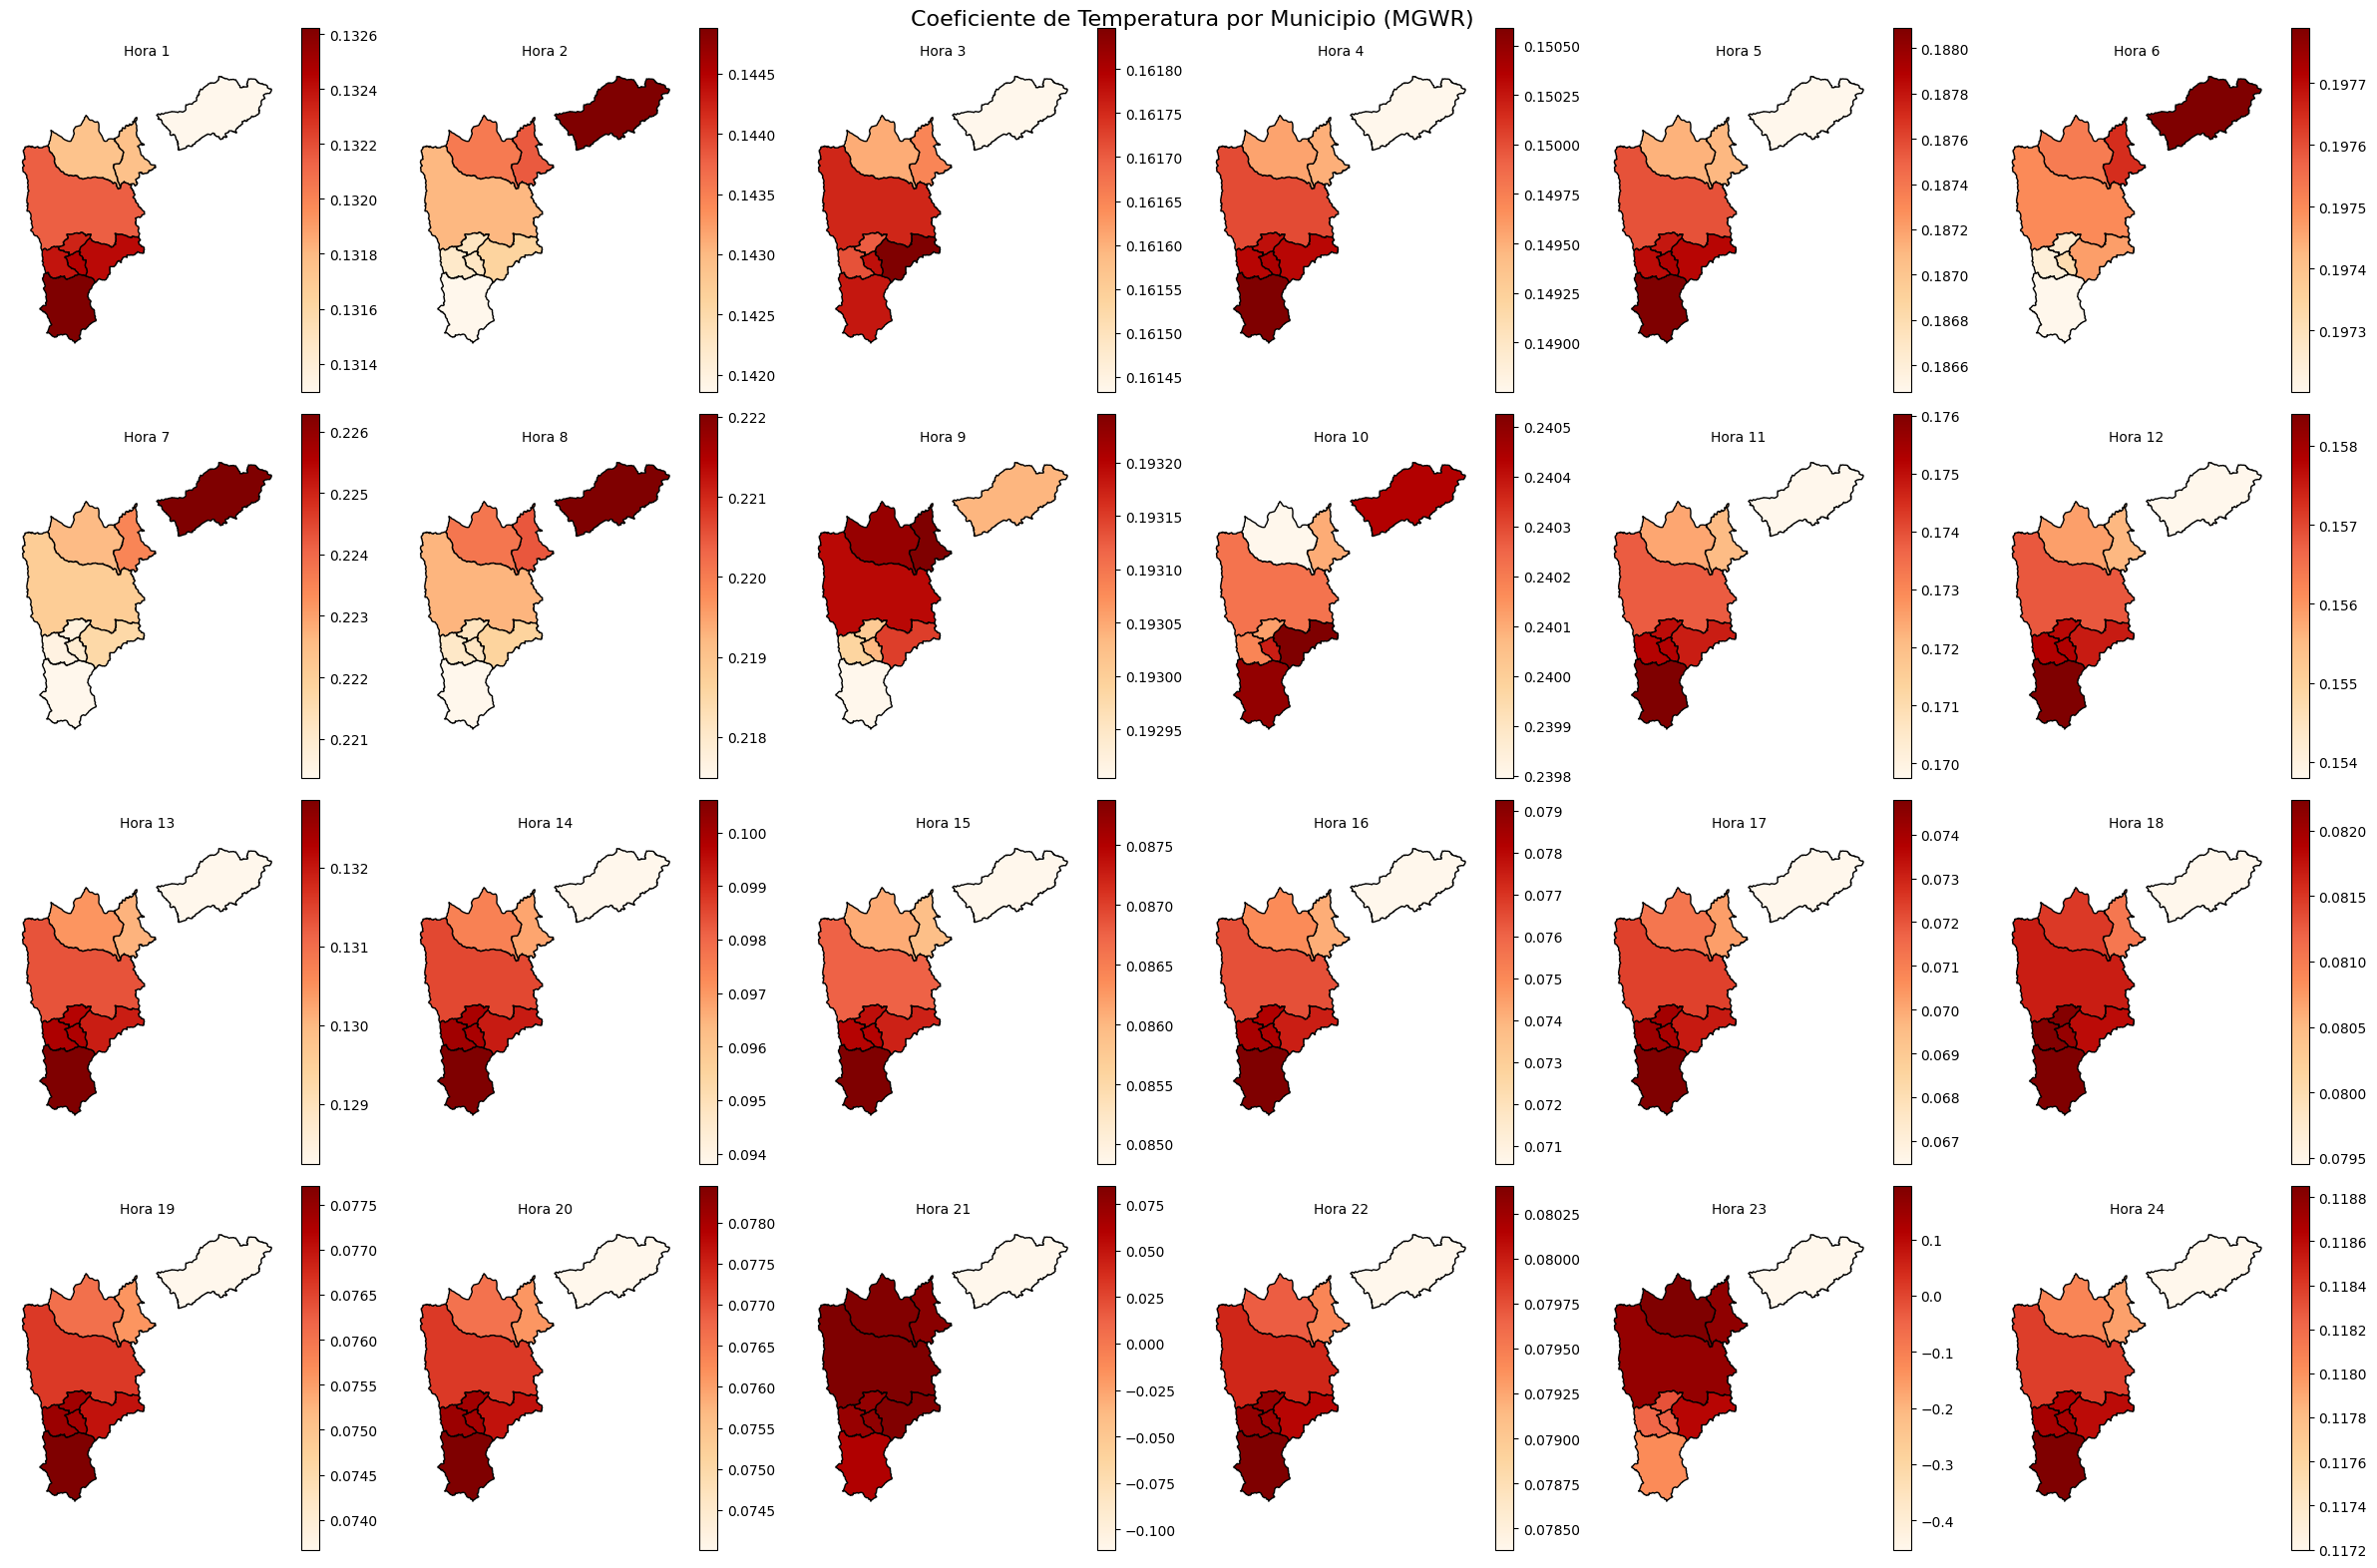

In [34]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(24, 16))
axes = axes.flatten()

for i, hora in enumerate(range(1, 25)):
    ax = axes[i]
    municipios_coef[municipios_coef['hora'] == hora].plot(
        column='temperatura', ax=ax, cmap='OrRd', edgecolor='black', legend=True
    )
    ax.set_title(f'Hora {hora}', fontsize=10)
    ax.axis('off')

plt.suptitle('Coeficiente de Temperatura por Municipio (MGWR)', fontsize=16)
plt.tight_layout()
plt.show()


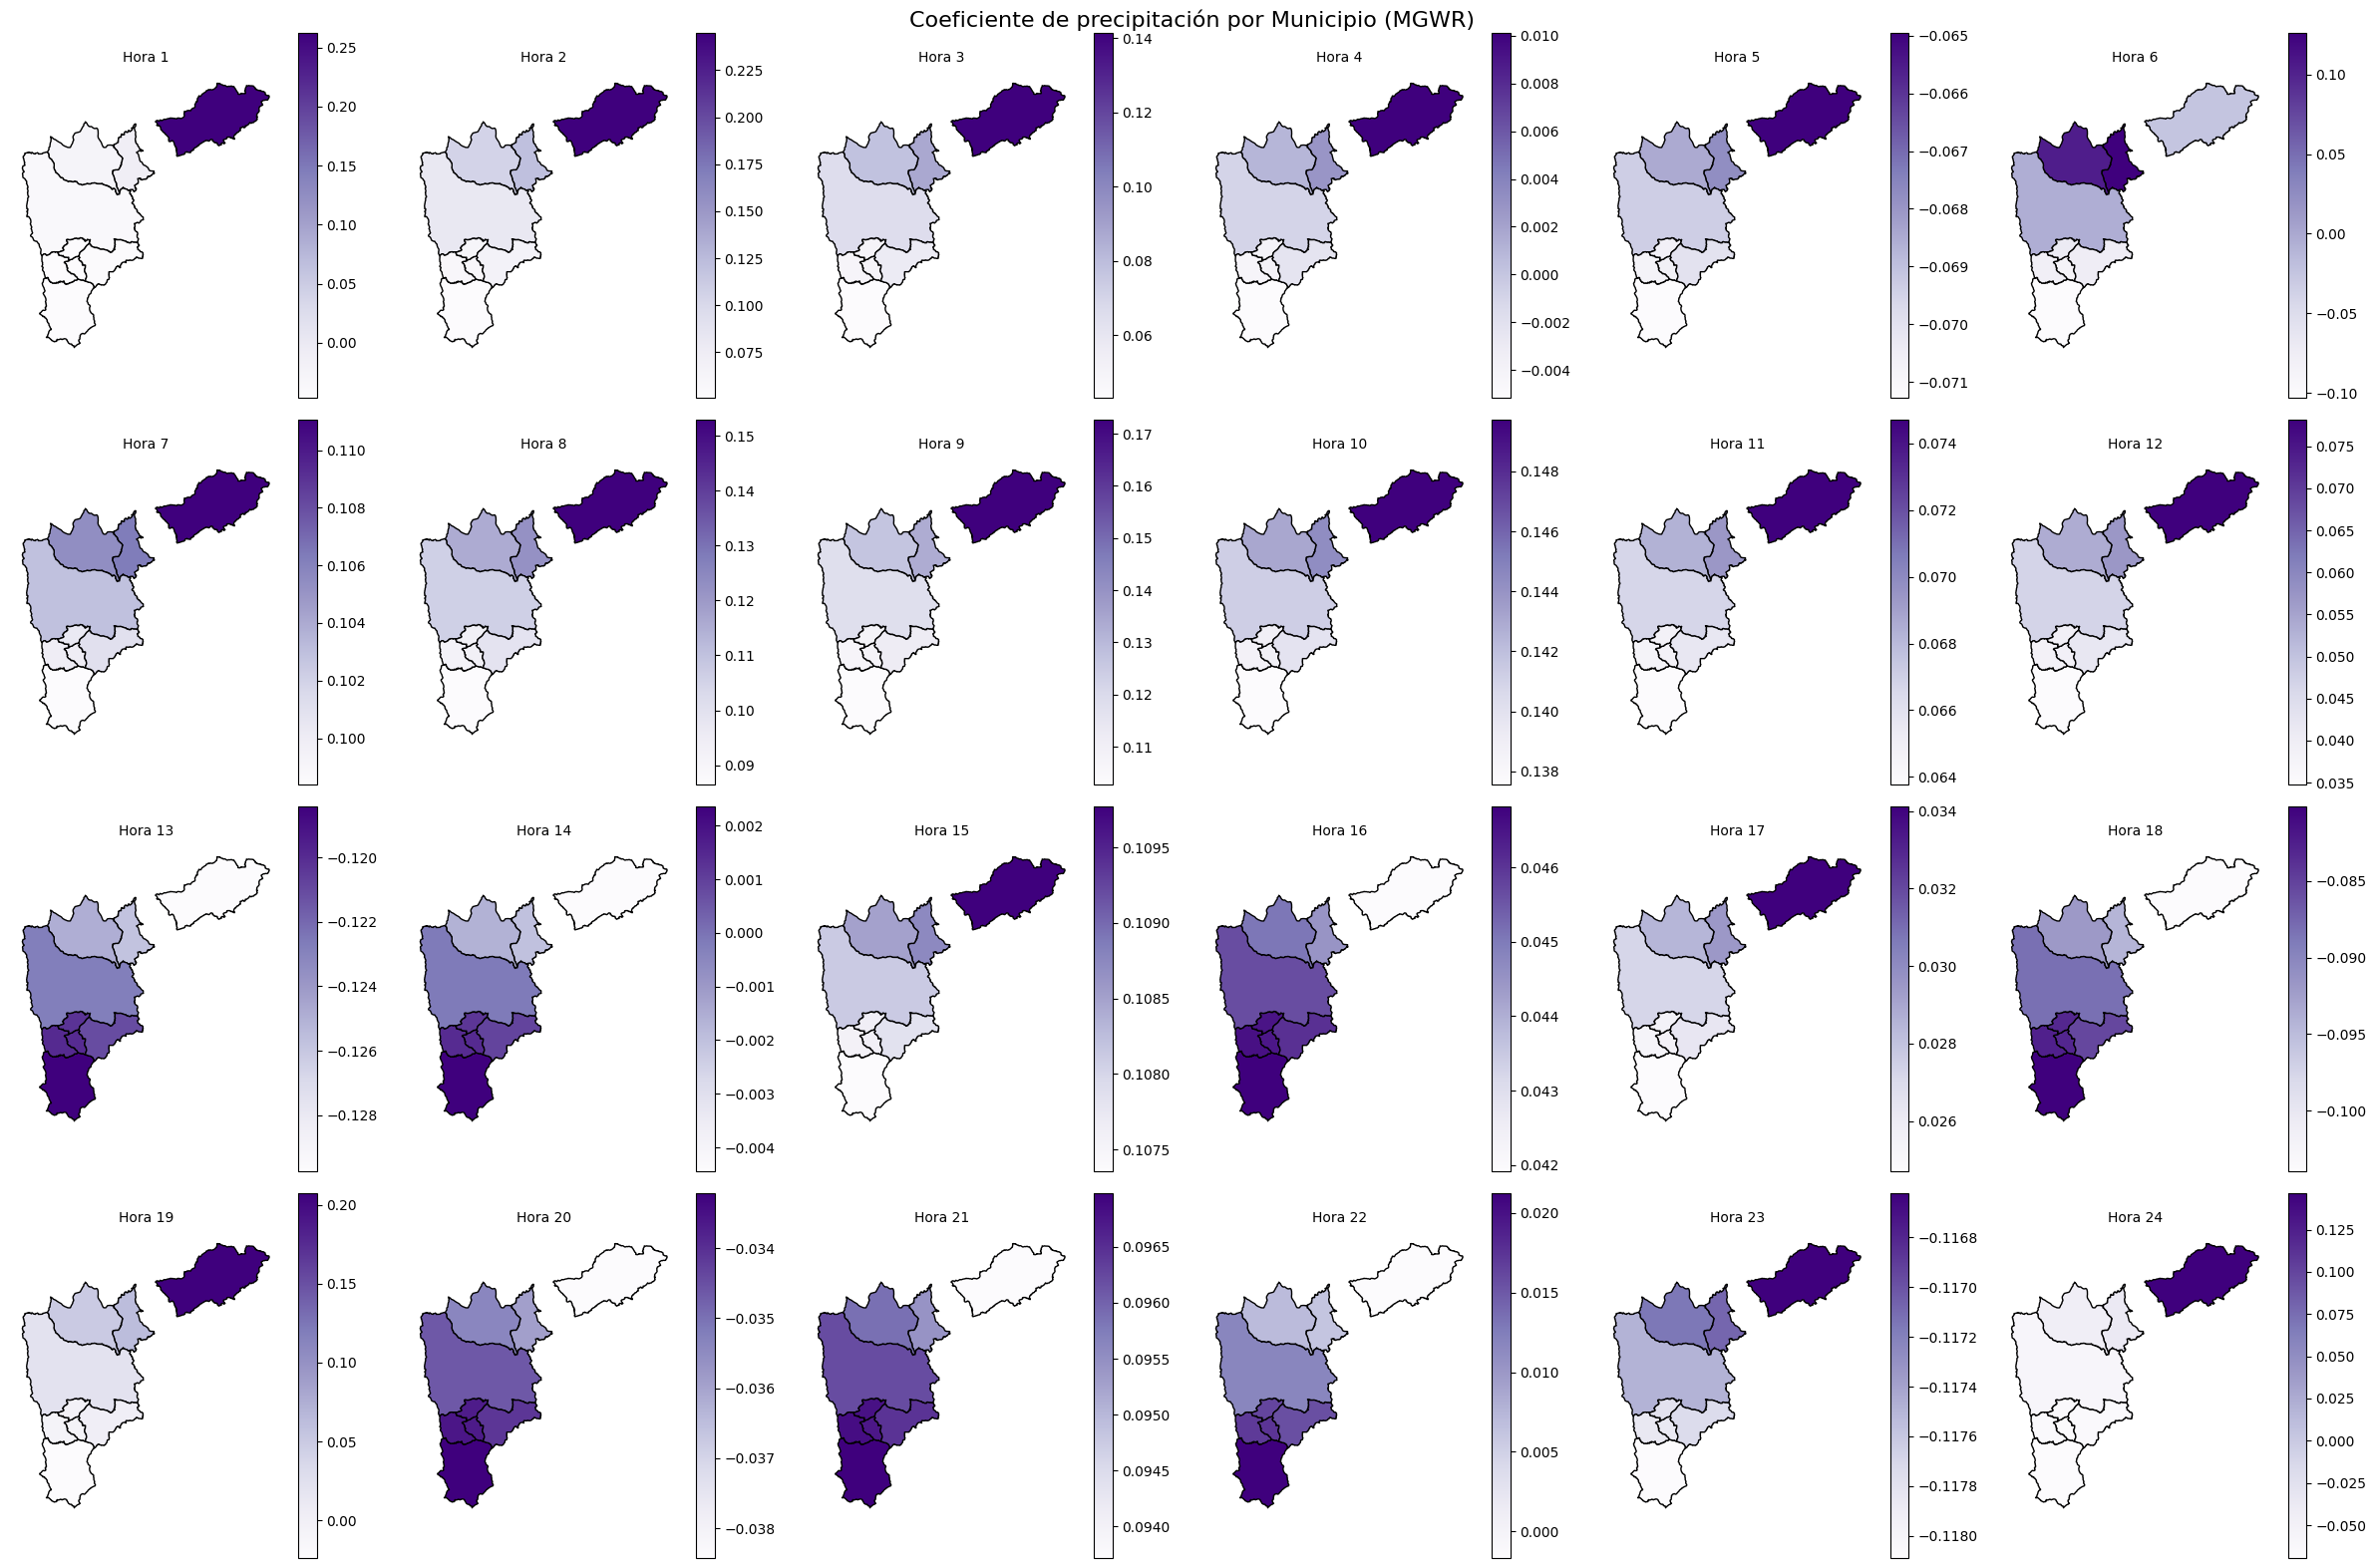

In [36]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(24, 16))
axes = axes.flatten()

for i, hora in enumerate(range(1, 25)):
    ax = axes[i]
    municipios_coef[municipios_coef['hora'] == hora].plot(
        column='pp_horaria', ax=ax, cmap='Purples', edgecolor='black', legend=True
    )
    ax.set_title(f'Hora {hora}', fontsize=10)
    ax.axis('off')

plt.suptitle('Coeficiente de precipitación por Municipio (MGWR)', fontsize=16)
plt.tight_layout()
plt.show()
